In [36]:
import numpy as np
import pandas as pd
from PIL import Image, ImageOps
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn import preprocessing
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [16]:
german_shepherd=[]
for file in os.listdir('dataset/german_shepherd/'):
    im = Image.open('dataset/german_shepherd/' + file)
    german_shepherd.append(im)
    


In [17]:
husky=[]
for file in os.listdir('dataset/husky/'):
    im = Image.open('dataset/husky/' + file)
    husky.append(im)
    


In [18]:
jack_russell=[]
for file in os.listdir('dataset/jack_russell/'):
    im = Image.open('dataset/jack_russell/' + file)
    jack_russell.append(im)
    


In [19]:
labrador=[]
for file in os.listdir('dataset/labrador/'):
    im = Image.open('dataset/labrador/' + file)
    labrador.append(im)
    

In [20]:
pug=[]
for file in os.listdir('dataset/pug/'):
    im = Image.open('dataset/pug/' + file)
    pug.append(im)
    

In [21]:
for i in [german_shepherd,husky,jack_russell,labrador,pug]:
    for j in range(len(i)):
        width, height = i[j].size
        if width == height:
            i[j] = i[j].resize((256,256), Image.ANTIALIAS)
        else:
            if width > height:
                left = width/2 - height/2
                right = width/2 + height/2
                top = 0
                bottom = height
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)
            else:
                left = 0
                right = width
                top = 0
                bottom = width
                i[j] = i[j].crop((left,top,right,bottom))
                i[j] = i[j].resize((256,256), Image.ANTIALIAS)

/var/folders/j1/rqzzhjks6hzdchp4vfqv0nq40000gn/T/ipykernel_5491/4157685279.py:20: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)
/var/folders/j1/rqzzhjks6hzdchp4vfqv0nq40000gn/T/ipykernel_5491/4157685279.py:13: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)
/var/folders/j1/rqzzhjks6hzdchp4vfqv0nq40000gn/T/ipykernel_5491/4157685279.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  i[j] = i[j].resize((256,256), Image.ANTIALIAS)


In [22]:
x = []
y = []

for i in [german_shepherd,husky,jack_russell,labrador,pug]:
    for j in range(len(i)):
        ar = np.asarray(i[j])
        x.append(ar)
x = np.array(x)

        
for i in range(5):
    lists = [german_shepherd,husky,jack_russell,labrador,pug]
    names = ['german_shepherd','husky','jack_russell','labrador','pug']
    for j in range(len(lists[i])):
        y.append(names[i])
        
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [23]:
print(names)

['german_shepherd', 'husky', 'jack_russell', 'labrador', 'pug']


In [24]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
for train_index, test_index in sss.split(x, y):
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]

## 2 FC layers

In [25]:
model = Sequential()


model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2,2)))

#model.add(Conv2D(32, (3,3), activation='relu'))
#model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))


model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))






model.add(Flatten())

model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxP

2022-05-22 03:27:15.189235: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-22 03:27:15.189368: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [26]:
#Compile the model
opt = tf.keras.optimizers.RMSprop(learning_rate=0.001)
opt2 = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer = opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print('compiled!')


compiled!


In [27]:
datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train = datagen.flow(x_train, y_train)

test = test_datagen.flow( x_test, y_test)

#from keras.callbacks import ModelCheckpoint

#checkpoint = ModelCheckpoint(filepath = 'best_model.h5',save_best_only = True,verbose=1)

hist = model.fit(train,batch_size=32, epochs=50, validation_data=test, verbose=2)

Epoch 1/50


2022-05-22 03:27:19.449799: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-22 03:27:19.779194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-22 03:27:21.988070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


14/14 - 3s - loss: 1.6396 - accuracy: 0.1512 - val_loss: 1.6074 - val_accuracy: 0.2083 - 3s/epoch - 196ms/step
Epoch 2/50
14/14 - 1s - loss: 1.6099 - accuracy: 0.2233 - val_loss: 1.6056 - val_accuracy: 0.2083 - 1s/epoch - 103ms/step
Epoch 3/50
14/14 - 1s - loss: 1.6071 - accuracy: 0.2302 - val_loss: 1.6322 - val_accuracy: 0.2083 - 1s/epoch - 105ms/step
Epoch 4/50
14/14 - 1s - loss: 1.6037 - accuracy: 0.2581 - val_loss: 1.5250 - val_accuracy: 0.3750 - 1s/epoch - 102ms/step
Epoch 5/50
14/14 - 1s - loss: 1.4471 - accuracy: 0.3674 - val_loss: 1.3951 - val_accuracy: 0.4792 - 1s/epoch - 100ms/step
Epoch 6/50
14/14 - 1s - loss: 1.4415 - accuracy: 0.4326 - val_loss: 1.3983 - val_accuracy: 0.3750 - 1s/epoch - 101ms/step
Epoch 7/50
14/14 - 2s - loss: 1.4125 - accuracy: 0.3930 - val_loss: 1.3341 - val_accuracy: 0.4583 - 2s/epoch - 111ms/step
Epoch 8/50
14/14 - 1s - loss: 1.2772 - accuracy: 0.4628 - val_loss: 1.3381 - val_accuracy: 0.3958 - 1s/epoch - 102ms/step
Epoch 9/50
14/14 - 2s - loss: 1.255

In [29]:
print(test_datagen.class_indices)

AttributeError: 'ImageDataGenerator' object has no attribute 'class_indices'

## Average

In [30]:
avg_train= np.mean(hist.history['accuracy']) 
print('The average accuracy for training set is: '+str(avg_train*100)+'%')

The average accuracy for training set is: 78.37674391269684%


In [31]:
avg_test= np.mean(hist.history['val_accuracy']) 
print('The average accuracy for test set is: '+str(avg_test*100)+'%')

The average accuracy for test set is: 48.58333486318588%


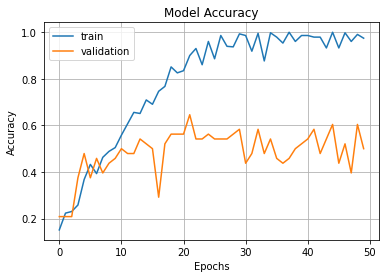

In [32]:
fig1 = plt.gcf()
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
#plt.axis(ymin=0.4,ymax=1.1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

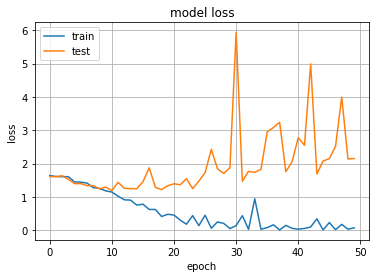

In [33]:
fig2 = plt.gcf() 
plt.plot(hist.history['loss'])  
plt.plot(hist.history['val_loss'])  
#plt.axis(ymin=0,ymax=1.1)
plt.grid()
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show() 

[[0. 0. 0. 1. 0.]]
The predicted class is labrador


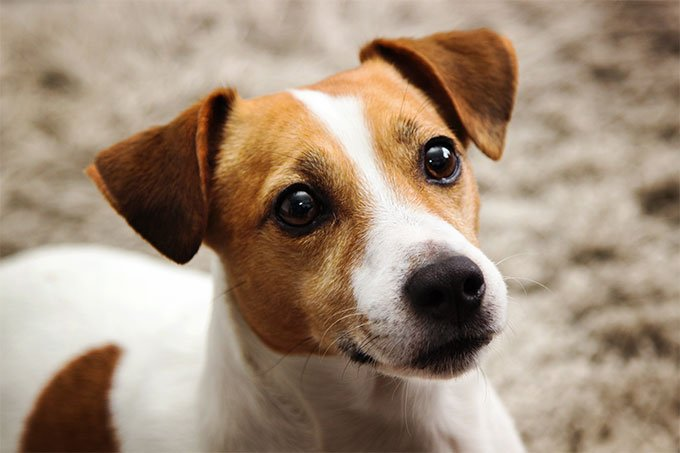

In [44]:
#Predictions

import cv2
import PIL

image_name = 'jr'
image=cv2.imread('unseen/'+image_name+'.jpg')
image_resized= cv2.resize(image, (256,256))
image=np.expand_dims(image_resized,axis=0)
#print(image.shape)
pred=model.predict(image)
print(pred)
output_class=names[np.argmax(pred)]
print("The predicted class is", output_class)

PIL.Image.open('unseen/'+image_name+'.jpg')